In [2]:
# 1. Install both the simulator and the hardware providers
!pip install qiskit-aer qiskit-ibm-runtime

# 2. Force a library refresh (Crucial for Colab)
import site
from importlib import reload
reload(site)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.4 MB/s eta 0:00:00


<module 'site' (frozen)>

🔬 Starting Quantum Benchmarking...

--- Results ---
Perfect Simulator Accuracy: 100.0%
Fake Marrakesh Accuracy: 97.00%
The 'Noise Gap' is: 3.00%


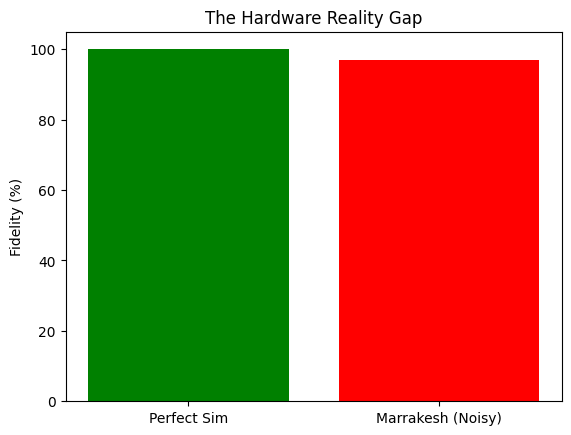

In [3]:
# 1. Setup - Ensuring all imports are correct for 2025 standards
try:
    from qiskit_ibm_runtime.fake_provider import FakeMarrakesh
except ImportError:
    !pip install qiskit-ibm-runtime
    from qiskit_ibm_runtime.fake_provider import FakeMarrakesh

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# 2. Define the two backends
perfect_sim = AerSimulator()  # The "Perfect" Math world
marrakesh_hw = FakeMarrakesh()
noisy_sim = AerSimulator.from_backend(marrakesh_hw)  # The "Noisy" Physics world

def run_benchmark(backend, shots=100):
    # We will try to send a '1' 100 times
    success_count = 0

    qc = QuantumCircuit(4, 4)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.z(0) # Sending a '1'
    qc.h([0, 1, 2, 3])
    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

    # Transpile and run
    t_qc = transpile(qc, backend)
    result = backend.run(t_qc, shots=shots).result()
    counts = result.get_counts()

    # Calculate how many times the parity was correctly '1'
    for outcome, count in counts.items():
        bits = [int(b) for b in outcome]
        if sum(bits) % 2 == 1: # Success condition
            success_count += count

    return (success_count / shots) * 100

# 3. Execute the Comparison
print("🔬 Starting Quantum Benchmarking...")
perfect_score = run_benchmark(perfect_sim)
noisy_score = run_benchmark(noisy_sim)

print(f"\n--- Results ---")
print(f"Perfect Simulator Accuracy: {perfect_score}%")
print(f"Fake Marrakesh Accuracy: {noisy_score:.2f}%")
print(f"The 'Noise Gap' is: {perfect_score - noisy_score:.2f}%")

# 4. Simple Visual Plot
labels = ['Perfect Sim', 'Marrakesh (Noisy)']
scores = [perfect_score, noisy_score]

plt.bar(labels, scores, color=['green', 'red'])
plt.ylabel('Fidelity (%)')
plt.title('The Hardware Reality Gap')
plt.show()